In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
# opening image in RGB format
img = cv2.imread('Fundus.png')
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])

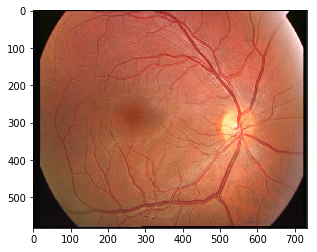

In [3]:
# displaying loaded image
plt.imshow(img)

In [4]:
# coordinates of the center of the image
center_x = int(img.shape[0]/2)
center_y = int(img.shape[1]/2)

In [5]:
# displaying center of the eye
temp = img.copy()
for i in range(center_x-4, center_x+5):
    for j in range(center_y-4, center_y+5):
        temp[i][j] = [0, 0, 255]

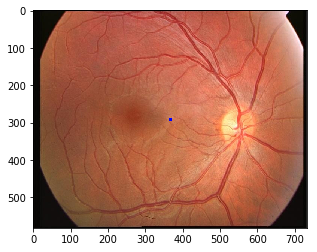

In [6]:
plt.imshow(temp)

In [7]:
# detecting blindspot
blind_spot_detector = img.copy()
blind_spot_detector = blind_spot_detector[center_x:, center_y:]

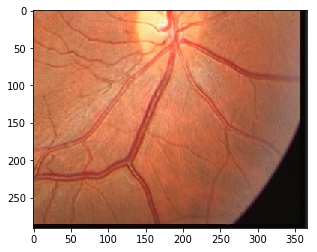

In [8]:
# getting lower right part of eye
plt.imshow(blind_spot_detector)

In [9]:
# algorithm to detect blind spot
blind_spot = (0, 0)
highest_rms = 0
for i in range(blind_spot_detector.shape[0]):
    for j in range(blind_spot_detector.shape[1]):
        (r, g, b) = blind_spot_detector[i][j]
        rms = math.sqrt(math.pow(r, 2)+math.pow(g, 2)+math.pow(b, 2))
        if rms > highest_rms:
            highest_rms = rms
            blind_spot = (i, j)

In [10]:
# displaying blind spot
temp_blind_spot = blind_spot_detector.copy()
for i in range(blind_spot[0]-4, blind_spot[0]+5):
    for j in range(blind_spot[1]-4, blind_spot[1]+5):
        temp_blind_spot[i][j] = [0, 0, 255]

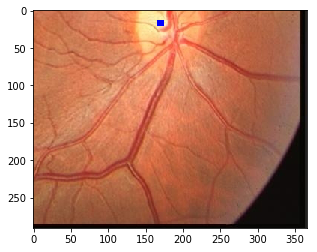

In [11]:
# showing the blind spot
plt.imshow(temp_blind_spot)

In [12]:
# calculating distance covered by each value
x_increments = blind_spot[1]/5
y_increments = blind_spot_detector.shape[0]/8

In [13]:
# plotting the data on the eye
mapping_data = blind_spot_detector.copy()
arr = [[34, 34, 0, 31],[34, 33, 31, 29],[34, 32, 30, 0],[33, 33, 0, 0]]

In [14]:
# plotting numeric data on the eye
font = cv2.FONT_HERSHEY_SIMPLEX

y_val = y_increments

for x in range(len(arr)):
    x_val = x_increments
    for y in range(len(arr[x])):
        if arr[x][y]:
            cv2.putText(mapping_data, str(arr[x][y]),(int(x_val),int(y_val)), font, 1,(0,0,255),2)
        x_val += (x_increments*2)
    y_val += (y_increments * 2)
    

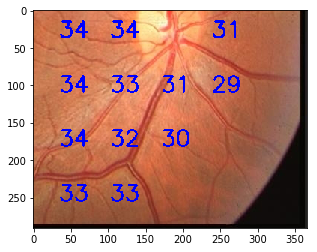

In [15]:
plt.imshow(mapping_data)

In [16]:
# values read from the Humphrey Field Analyser
full_array = [[0, 0, 0, 22, 24, 23, 22, 0, 0], [0, 0, 26, 28, 28, 26, 27, 31, 0], [0, 20, 24, 31, 32, 29, 30, 28, 28], [21, 22, 25, 30, 32, 32, 29, 27, 28], [28, 28, 28, 32, 33, 34, 34, 0, 31], [0, 28, 30, 35, 33, 34, 33, 31, 29], [0, 0, 29, 33, 32, 34, 32, 30, 0], [0, 0, 0, 29, 32, 33, 33, 0, 0]]
difference_array = [[0, 0, 0, -5, -3, -4, -4, 0, 0], [0, 0, -2, -1, -1, -3, -2, 3, 0], [0, -9, -6, 0, 0, -2, 0, -1, 0], [-6, -8, -6, -2, -1, 0, -2, 0, -1], [1, -1, -3, 0, 0, 1, 2, 0, 1], [0, -1, -1, 3, 1, 2, 2, 0, 0], [0, 0, 0, 2, 1, 3, 1, 0, 0], [0, 0, 0, 0, 3, 4, 3, 0, 0]]

In [17]:
# converting arrays into numpy arrays
full_array = np.array(full_array)
difference_array = np.array(difference_array)

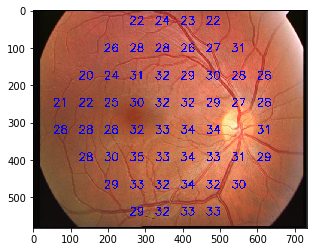

In [18]:
# plotting the numbers on the eye
num_image = img.copy()
# Starting value of Y
y = center_y - (len(full_array)/2)*y_increments*2 - y_increments
for i in range(len(full_array)):
    x = center_x - (len(full_array[i])/2)*x_increments*2 + 2*x_increments
    for j in range(len(full_array[i])):
        if full_array[i][j]:
            cv2.putText(num_image, str(full_array[i][j]),(int(x),int(y)), font, 1,(0,0,255),2)
        x += (x_increments * 2)
    y += (y_increments*2)

plt.imshow(num_image)

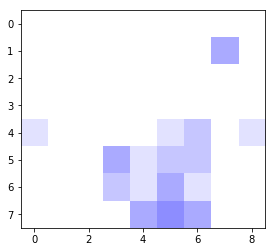

In [19]:
# normalizing the difference array
e = (difference_array/ max(difference_array.min(), difference_array.max(), key=abs))
e = e.clip(max=0)
e = ((e+1)*255).astype(int)
cv2.imwrite('difference_picture.png', e)
e = cv2.imread('difference_picture.png')
for i in range(e.shape[0]):
    for j in range(e.shape[1]):
        e[i][j] = np.array([e[i][j][0], e[i][j][1], 255])
plt.imshow(e)


In [20]:
# resizing the data
h = y_increments*2 * len(e)
w = x_increments*2 * len(e[0])

In [21]:
g = cv2.resize(e, (int(w), int(h)))

In [22]:
cv2.imwrite('difference_picture.png', g)

True

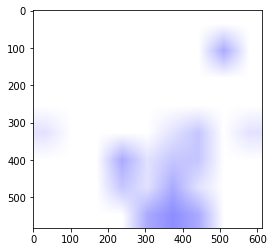

In [23]:
# visualizing the data
plt.imshow(g)

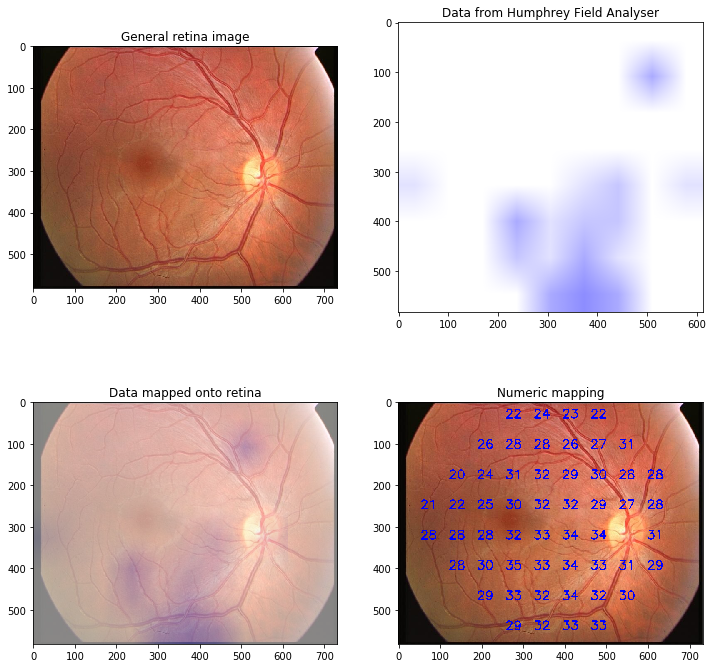

In [25]:
# mapping the data onto the eyeball
f, axarr = plt.subplots(2,2)
f.set_size_inches(12, 12)
axarr[0][0].set_title('General retina image')
axarr[0][1].set_title('Data from Humphrey Field Analyser')
axarr[1][0].set_title('Data mapped onto retina')
axarr[1][1].set_title('Numeric mapping')
axarr[1][0].imshow(g, alpha=1)
axarr[1][0].imshow(img, alpha=0.5)
axarr[0][1].imshow(g)
axarr[0][0].imshow(img)
axarr[1][1].imshow(num_image)